<a href="https://colab.research.google.com/github/gotjd709/AI_class_KSA/blob/main/20_12_09_Wed_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout 

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation= 'relu'))
model.add(Dense(10, activation = 'sigmoid')) #class의 개수가 10개 이므로 10을 넣을 것)

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

hist = model.fit(X_train, y_train,
                 validation_data=(X_test, y_test),
                 verbose=2, batch_size=100, epochs=15,
                 use_multiprocessing=True)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

100/100 - 0s - loss: 0.0739 - accuracy: 0.9838


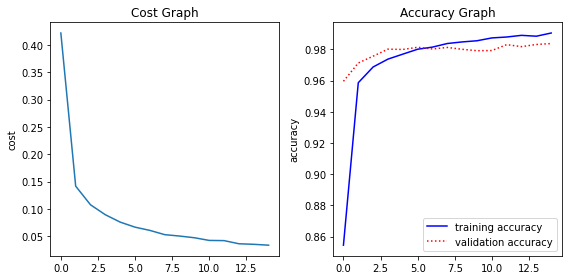

In [4]:
model.evaluate(X_test, y_test, 
               verbose=2, batch_size=100, use_multiprocessing=True)
plt.figure(figsize=(8, 4)) # 8 x 4 inchs 
plt.subplot(1, 2, 1) 
plt.plot(hist.history['loss']) 
plt.title("Cost Graph") 
plt.ylabel("cost") 
plt.subplot(1, 2, 2) 
plt.title("Accuracy Graph") 
plt.ylabel("accuracy") 
plt.plot(hist.history['accuracy'], 'b-', label="training accuracy") 
plt.plot(hist.history['val_accuracy'], 'r:', label="validation accuracy") 
plt.legend() 
plt.tight_layout() 
plt.show()

image.shape =  (1, 3, 3, 1)
image.reshaped.shape =  (3, 3)
image.reshaped:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


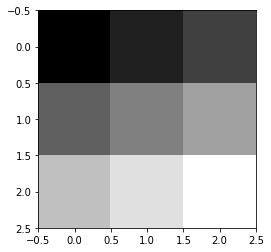

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print('image.shape = ', image.shape) #(1,3,3,1) : (number, row, col, channel)
print('image.reshaped.shape = ', image.reshape(3,3).shape)
print('image.reshaped:\n', image.reshape(3,3), sep='')
plt.imshow(image.reshape(3,3), cmap='gray')

In [13]:
weight = tf.constant([[[[1.0]],[[1.0]]],
 [[[1.0]],[[1.0]]]])
print('weight.shape = ', weight.shape) #(2,2,1,1):(row,col,channel,number)
weight_init = tf.constant_initializer(weight.numpy())
weight_img = tf.reshape(weight, (2,2))
print('weight.reshaped.shape = ', weight_img.shape)
print('weight.reshaped:\n', weight_img.numpy(), sep='')

weight.shape =  (2, 2, 1, 1)
weight.reshaped.shape =  (2, 2)
weight.reshaped:
[[1. 1.]
 [1. 1.]]


In [14]:
print("padding='VALID'") # 패딩(바깥여백)을 적용안함
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',
 kernel_initializer=weight_init)(image)
conv2d_img = conv2d.numpy()
print('conv2d_img.shape = ', conv2d_img.shape)
print('conv2d_img:\n', conv2d_img, sep='')
print('conv2d_img.reshaped.shape = ', conv2d_img.reshape(2,2).shape)
print('conv2d_img.reshaped:\n', conv2d_img.reshape(2,2), sep='')


padding='VALID'
conv2d_img.shape =  (1, 2, 2, 1)
conv2d_img:
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
conv2d_img.reshaped.shape =  (2, 2)
conv2d_img.reshaped:
[[12. 16.]
 [24. 28.]]


In [15]:
print("padding='SAME'") # 출력이 입력과 같은 크기가 되도록 패딩을 적용함
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME',
 kernel_initializer=weight_init)(image)
conv2d_img = conv2d.numpy()
print('conv2d_img.shape = ', conv2d_img.shape)
print('conv2d_img:\n', conv2d_img, sep='')
print('conv2d_img.reshaped.shape = ', conv2d_img.reshape(3,3).shape)
print('conv2d_img.reshaped:\n', conv2d_img.reshape(3,3), sep='')


padding='SAME'
conv2d_img.shape =  (1, 3, 3, 1)
conv2d_img:
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
conv2d_img.reshaped.shape =  (3, 3)
conv2d_img.reshaped:
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


In [16]:
weight = tf.constant([[[[1.0, 10.0, -1.0]],[[1.0, 10.0, -1.0]]],
 [[[1.0, 10.0, -1.0]],[[1.0, 10.0, -1.0]]]])
weight_img = weight.numpy()
print('weight.shape = ', weight.shape) # (2,2,1,3)=>(row,col,channel,number)
weight_init = tf.constant_initializer(weight.numpy())
weight_img = np.swapaxes(weight_img, 0, 3)
for i, one_img in enumerate(weight_img):
 print(one_img.reshape(2,2))

weight.shape =  (2, 2, 1, 3)
[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[-1. -1.]
 [-1. -1.]]


In [17]:
import numpy as np
x = np.array([[1,2,3]])
print('-----------------------------------')
print('shape = ', x.shape)
print(x)
print('---- swap 0 and 1 -----------------')
print('shape = ', np.swapaxes(x, 0, 1).shape)
print(np.swapaxes(x, 0, 1))
y = np.array([[[0,1],[2,3],[4,5],[6,7]]])
print('-----------------------------------')
print('shape = ', y.shape)
print(y)
print('---- swap 0 and 1 -----------------')
print('shape = ', np.swapaxes(y, 0, 1).shape)
print(np.swapaxes(y, 0, 1))
print('---- swap 0 and 2 -----------------')
print('shape = ', np.swapaxes(y, 0, 2).shape)
print(np.swapaxes(y, 0, 2))
print('---- swap 1 and 2 -----------------')
print('shape = ', np.swapaxes(y, 1, 2).shape)
print(np.swapaxes(y, 1, 2))

-----------------------------------
shape =  (1, 3)
[[1 2 3]]
---- swap 0 and 1 -----------------
shape =  (3, 1)
[[1]
 [2]
 [3]]
-----------------------------------
shape =  (1, 4, 2)
[[[0 1]
  [2 3]
  [4 5]
  [6 7]]]
---- swap 0 and 1 -----------------
shape =  (4, 1, 2)
[[[0 1]]

 [[2 3]]

 [[4 5]]

 [[6 7]]]
---- swap 0 and 2 -----------------
shape =  (2, 4, 1)
[[[0]
  [2]
  [4]
  [6]]

 [[1]
  [3]
  [5]
  [7]]]
---- swap 1 and 2 -----------------
shape =  (1, 2, 4)
[[[0 2 4 6]
  [1 3 5 7]]]


In [18]:
print("padding='SAME'")
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
 kernel_initializer=weight_init)(image)
conv2d_img = conv2d.numpy()
print('conv2d_img.shape = ', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
 print(one_img.reshape(3,3))

padding='SAME'
conv2d_img.shape =  (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


In [19]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
image = np.array([[[[1],[2],[3]],
 [[4],[5],[6]],
 [[7],[8],[9]]]], dtype=np.float32)
print('image.shape = ', image.shape)
print('image.reshaped.shape = ', image.reshape(3,3).shape)
print('image.reshaped:\n', image.reshape(3,3), sep='')

image.shape =  (1, 3, 3, 1)
image.reshaped.shape =  (3, 3)
image.reshaped:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [20]:
print("padding='SAME'")
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1,
padding='SAME')(image)
pool_img = pool.numpy()
print('pool_img.shape = ', pool_img.shape)
conv2d_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
 print(one_img.reshape(3,3))

padding='SAME'
pool_img.shape =  (1, 3, 3, 1)
[[5. 6. 6.]
 [8. 9. 9.]
 [8. 9. 9.]]


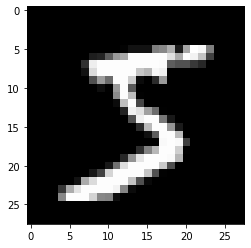

In [21]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0
img = X_train[0]
plt.imshow(img, cmap='gray')
plt.show()

conv2d.shape = (1, 14, 14, 5)


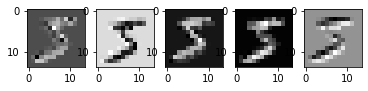

In [22]:
img = img.reshape(-1, 28, 28, 1)
img = tf.convert_to_tensor(img)
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2,2),
 padding='SAME',
 kernel_initializer=weight_init)(img)
print(f"conv2d.shape = {conv2d.shape}")
images = np.swapaxes(conv2d, 0, 3)
for i, image in enumerate(images):
 plt.subplot(1, 5, i+1)
 plt.imshow(image.reshape(14,14), cmap='gray')
plt.show()

pool.shape = (1, 7, 7, 5)


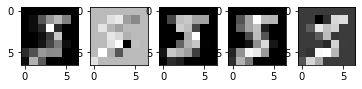

In [23]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2),
 padding='SAME')(conv2d)
print(f"pool.shape = {pool.shape}")
images = np.swapaxes(pool, 0, 3)
for i, image in enumerate(images):
 plt.subplot(1, 5, i+1)
 plt.imshow(image.reshape(7,7), cmap='gray')
plt.show()

In [25]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0
# print(X_train.shape, X_train.dtype)
# print(Y_train.shape, Y_train.dtype)
# print(X_test.shape, X_test.dtype)
# print(Y_test.shape, Y_test.dtype)

In [28]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), padding='same',
activation='relu', input_shape=(28, 28, 1)),
 tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
 tf.keras.layers.Dropout(0.3),
 tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1),
padding='same', activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
 tf.keras.layers.Dropout(0.3),
 tf.keras.layers.Conv2D(128, (3, 3), padding='same',
activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=["accuracy"])
model.summary()
hist = model.fit(X_train, Y_train,
 validation_data=(X_test, Y_test),
 verbose=2, batch_size=100, epochs=5, use_multiprocessing=True)
model.evaluate(X_test, Y_test,
 verbose=2, batch_size=100, use_multiprocessing=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)        

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0
# print(X_train.shape, X_train.dtype)
# print(Y_train.shape, Y_train.dtype)
# print(X_test.shape, X_test.dtype)
# print(Y_test.shape, Y_test.dtype)
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu’,
input_shape=(28, 28, 1)),
 tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
 tf.keras.layers.Dropout(0.3),
 tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same’,
activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
 tf.keras.layers.Dropout(0.3),
 tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=["accuracy"])
model.summary()
hist = model.fit(X_train, Y_train,
 validation_data=(X_test, Y_test),
 verbose=2, batch_size=100, epochs=5, use_multiprocessing=True)
model.evaluate(X_test, Y_test,
 verbose=2, batch_size=100, use_multiprocessing=True)
# Reporting......
plt.figure(figsize=(8, 4)) # 8 x 4 inchs
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("Cost Graph")
plt.ylabel("cost")
plt.subplot(1, 2, 2)
plt.title("Accuracy Graph")
plt.ylabel("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training accuracy")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()
